# Income Qualification Project

Following actions should be performed:

1. Identify the output variable.
2. Understand the type of data.
3. Check if there are any biases in your dataset.
4. Check whether all members of the house have the same poverty level.
5. Check if there is a house without a family head.
6. Set poverty level of the members and the head of the house within a family.
7. Count how many null values are existing in columns.
8. Remove null value rows of the target variable.
9. Predict the accuracy using random forest classifier.
10. Check the accuracy using random forest with cross validation.

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [4]:
# importing training and testing datasets

iq_train = pd.read_csv("iqtrain.csv")
iq_test = pd.read_csv("iqtest.csv")

print(iq_train.shape,iq_test.shape)

(9557, 143) (23856, 142)


In [5]:
iq_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [6]:
iq_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [7]:
iq_train.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [8]:
iq_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [9]:
iq_train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


#1. Identify the Output Variable

In [11]:
Y = iq_train['Target']

In [12]:
Y

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9557, dtype: int64

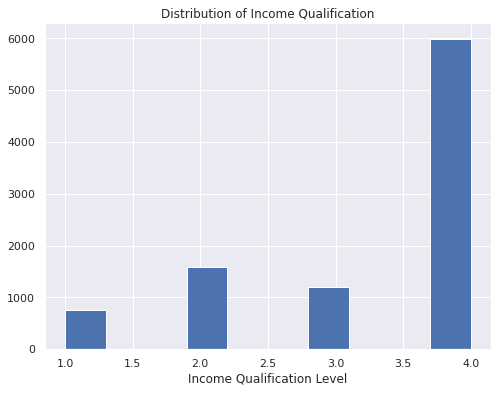

In [13]:
plt.figure(figsize=(8,6))
plt.hist(Y)
plt.xlabel('Income Qualification Level')
plt.title('Distribution of Income Qualification')
plt.show()

#Income level distribution with Income Qualification level 4.0 maximum

#2. Understanding the type of data

In [17]:
type(iq_train)

pandas.core.frame.DataFrame

In [18]:
iq_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


# 8 float columns, 130 integer type columns and 5 object type columns

# 3. Check if there are any biases on your dataset

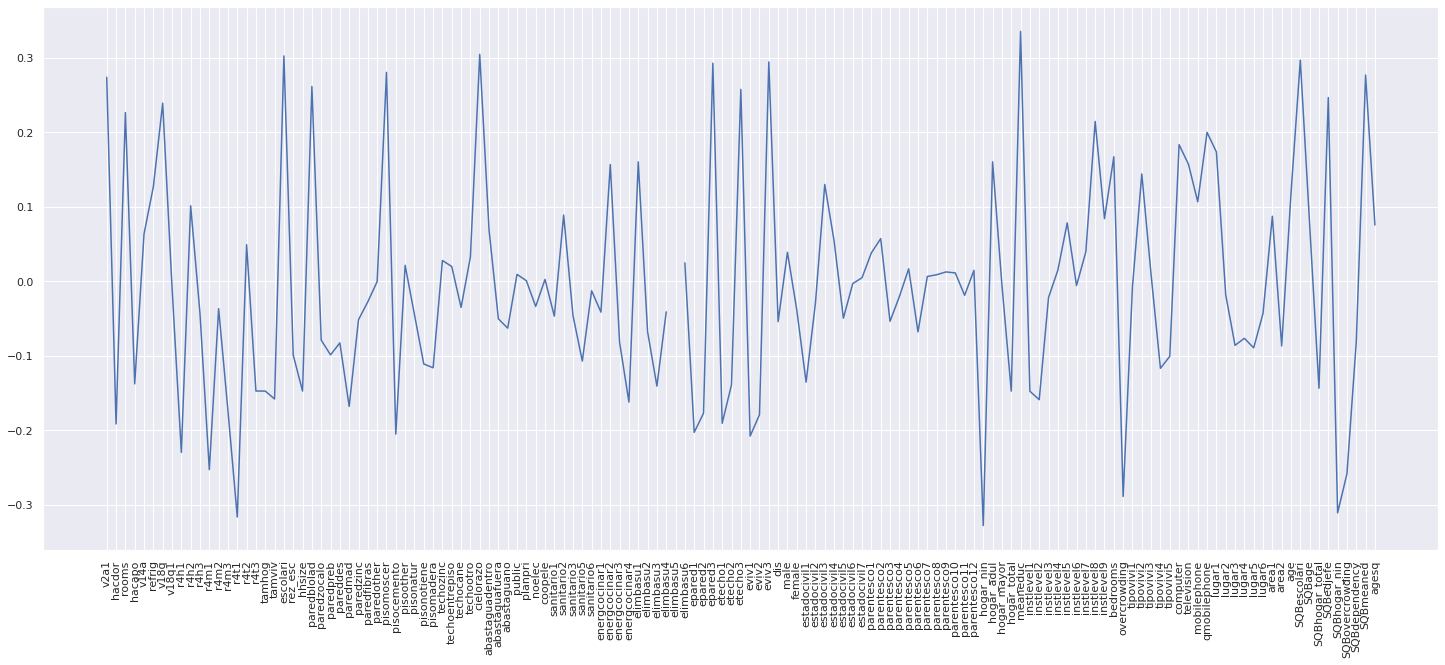

In [20]:
plt.figure(figsize=(25,10))
plt.plot(iq_train.corr().loc['Target'].drop('Target'))
plt.xticks(rotation='vertical')
plt.show()

# slope varies from -0.3 to +0.3

# 4. Check whether all members of the house have the same poverty level.

In [21]:
# assuming idhogar is unique id for household

sum(iq_train.groupby('idhogar')['Target'].nunique()!=1)

85

# There are 85 households where all members of the house do not have same poverty level

# 5. Check if there is a house without a family head.

In [22]:
sum(iq_train.groupby('idhogar')['parentesco1'].sum()==0)

15

# There are 15 houses without a family head

# 6. Set poverty level of the members and the head of the house within a family.

In [24]:
def setPovertyLevel(df):
    for name in df['idhogar'].unique():
        if df.groupby('idhogar').get_group(name)['Target'].nunique()!=1:
            houses = df[df['idhogar']==name]
            povertyLevel = houses[houses['parentesco1']==1]['Target']
            iq_train.loc[iq_train['idhogar']==name, 'Target'] = float(povertyLevel)
            
setPovertyLevel(iq_train)
sum(iq_train.groupby('idhogar')['Target'].nunique()!=1)

0

# No household having having different level of poverty among members.

# 7. Count how many null values are existing in columns.

In [25]:
dict = {}
def checkNull(df):
    for col in df.columns:
        if df[col].isnull().any():
            dict[col] = df[col].isnull().sum()

checkNull(iq_train)
print('Number of null value columns in training dataset ',dict)
checkNull(iq_test)
print('Number of null value columns in testing dataset ',dict)

Number of null value columns in training dataset  {'v2a1': 6860, 'v18q1': 7342, 'rez_esc': 7928, 'meaneduc': 5, 'SQBmeaned': 5}
Number of null value columns in testing dataset  {'v2a1': 17403, 'v18q1': 18126, 'rez_esc': 19653, 'meaneduc': 31, 'SQBmeaned': 31}


# 6 columns with the above number of null values

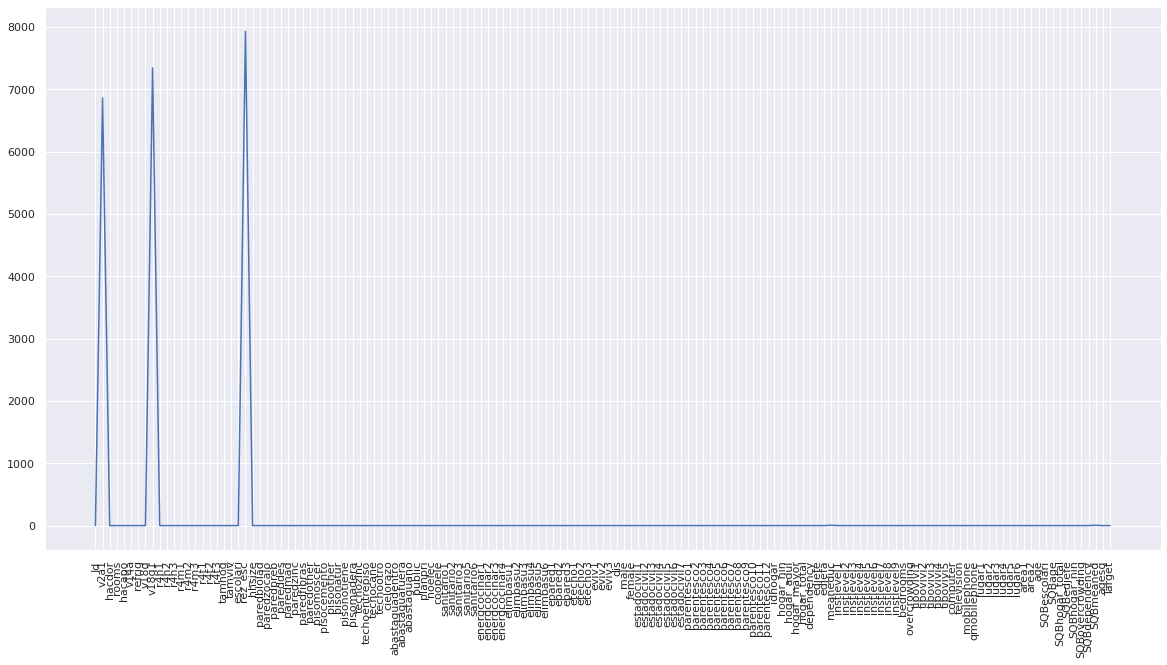

In [26]:
plt.figure(figsize=(20,10))
plt.plot(iq_train.isnull().sum())
plt.xticks(rotation='vertical')
plt.show()

In [27]:
iq_test[iq_test['v18q1'].isnull()]['v18q'].unique()

array([0])

In [29]:
iq_train.loc[iq_train['v18q1'].isnull(),'v18q1'] = 0
iq_train['v18q1'].isnull()

iq_test.loc[iq_test['v18q1'].isnull(),'v18q1'] = 0
iq_test['v18q1'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
23851    False
23852    False
23853    False
23854    False
23855    False
Name: v18q1, Length: 23856, dtype: bool

In [30]:
own_variables = [x for x in iq_train if x.startswith('tipo')]

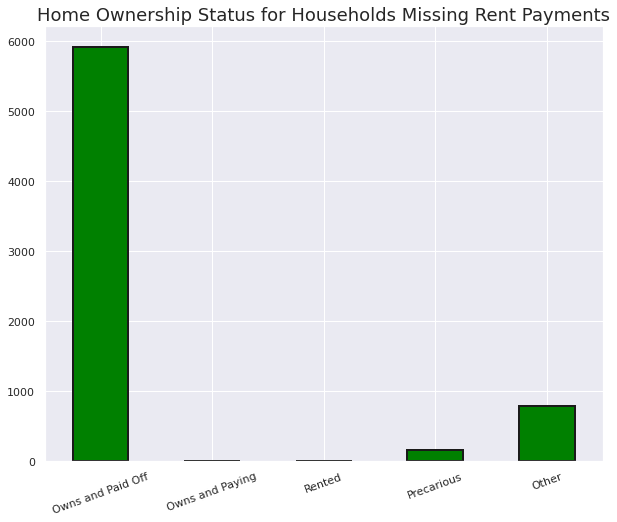

In [31]:
iq_train.loc[iq_train['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8),
                                                                        color = 'green',
                                                              edgecolor = 'k', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4],
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
          rotation = 20)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

In [32]:
iq_train.loc[iq_train['v2a1'].isnull(),'v2a1'] = 0
iq_train['v2a1'].isnull()

iq_test.loc[iq_test['v2a1'].isnull(),'v2a1'] = 0
iq_test['v2a1'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
23851    False
23852    False
23853    False
23854    False
23855    False
Name: v2a1, Length: 23856, dtype: bool

In [33]:
iq_train[iq_train['rez_esc'].isnull()]['age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [34]:
iq_train[(iq_train['rez_esc'].isnull())]['age'].unique()

array([43, 67, 92, 37, 38, 30, 28, 18, 34, 79, 39, 19, 70, 50, 22, 26, 69,
       66, 41, 20, 40, 44, 62, 33, 35, 56, 52, 36, 24, 76, 94, 45, 48, 42,
       71, 29, 55,  1, 60, 74, 57, 31, 89, 59,  4, 46, 75, 78, 53, 63, 51,
       21, 47, 49, 68, 73, 97, 72,  6,  5, 58, 27,  3,  2, 61, 25,  0, 23,
       54, 32, 65, 77, 81, 88, 64, 87, 82, 95, 80, 85, 83, 84, 90, 86, 91,
       93, 10])

In [35]:
iq_train.loc[(iq_train['rez_esc'].isnull()), 'rez_esc'] = 0
iq_test.loc[(iq_test['rez_esc'].isnull()), 'rez_esc'] = 0

In [36]:
iq_train.loc[(iq_train['meaneduc'].isnull()), 'meaneduc'] = 0
iq_test.loc[(iq_test['meaneduc'].isnull()), 'meaneduc'] = 0

In [37]:
# We will again check the null values

dict = {}
def checkNull(df):
    for col in df.columns:
        if df[col].isnull().any():
            dict[col] = df[col].isnull().sum()

checkNull(iq_train)
print('Number of null value columns in training dataset ',dict)
checkNull(iq_test)
print('Number of null value columns in testing dataset ',dict)

Number of null value columns in training dataset  {'SQBmeaned': 5}
Number of null value columns in testing dataset  {'SQBmeaned': 31}


# 8. Remove null value rows of the target variable.

In [38]:
iq_train['Target'].isnull().any()

False

In [39]:
iq_train[iq_train['Target'].isnull()==False]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,0.0,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,0.0,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,0.0,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,0.0,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


#9. Predict the accuracy using random forest classifier.

In [41]:
# We will drop squared columns since they will be highly correlated to their square root columns

squared_columns_drop = ['SQBescolari','SQBage','SQBhogar_total','SQBedjefe','SQBhogar_nin','SQBovercrowding','SQBdependency','SQBmeaned','agesq']
iq_train.drop(squared_columns_drop, axis=1, inplace=True)
iq_test.drop(squared_columns_drop, axis=1, inplace=True)

In [42]:
# We will drop column in a pair having correlation > 0.95

# Create correlation matrix
corr_matrix = iq_train.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
to_drop

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


['tamhog', 'hhsize', 'coopele', 'female', 'hogar_total', 'area2']

In [43]:
iq_train.drop(to_drop, axis=1, inplace=True)
iq_test.drop(to_drop, axis=1, inplace=True)

In [44]:
print(iq_train.shape,iq_test.shape)

(9557, 128) (23856, 127)


In [45]:
# label encoding object types

from sklearn.preprocessing import LabelEncoder

In [46]:
lbl = LabelEncoder()
iq_train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [47]:
iq_train['dependency'] = lbl.fit_transform(iq_train['dependency'])
iq_train['edjefe'] = lbl.fit_transform(iq_train['edjefe'])
iq_train['edjefa'] = lbl.fit_transform(iq_train['edjefa'])

iq_test['dependency'] = lbl.fit_transform(iq_test['dependency'])
iq_test['edjefe'] = lbl.fit_transform(iq_test['edjefe'])
iq_test['edjefa'] = lbl.fit_transform(iq_test['edjefa'])

In [48]:
iq_train.select_dtypes('float').head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding
0,190000.0,0.0,0.0,10.0,1.000000
1,135000.0,1.0,0.0,12.0,1.000000
2,0.0,0.0,0.0,11.0,0.500000
3,180000.0,1.0,1.0,11.0,1.333333
4,180000.0,1.0,0.0,11.0,1.333333


In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs = -1)

In [55]:
X = iq_train.drop(['Id','Target','idhogar'], axis=1)

In [56]:
model.fit(X, Y)

RandomForestClassifier(n_jobs=-1, random_state=10)

#10. Check the accuracy using random forest with cross validation.

In [57]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=model, X=X, y=Y, cv=10)

In [58]:
all_accuracies.mean()

0.6250694429231747

# Predicted the accuracy using 10 fold sampling. Accuracy of the model is 62.1%